## Reducción de dimensiones de vectores

Cuando un modelo de embeddings soporta MRL (Matryoshka Representation Learning o Aprendizaje de Representación Matryoshka), podemos usarlo para reducir la dimensionalidad de los vectores. Para índices vectoriales grandes, esto puede ayudar a acelerar la búsqueda y reducir los costos de almacenamiento.

In [1]:
# Cargamos los vectores desde movies.json, {movie: [vector]}
import json

with open('embeddings/peliculas_text-embedding-3-small-1536.json') as f:
    movies_1536 = json.load(f)

with open('embeddings/peliculas_text-embedding-3-small-256.json') as f:
    movies_256t = json.load(f)

print(len(movies_1536['El Rey León']))
print(movies_1536['El Rey León'][0:4])

print(len(movies_256t['El Rey León']))
print(movies_256t['El Rey León'][0:4])

1536
[-0.004623414948582649, 0.0006771952612325549, -0.025644199922680855, 0.016358787193894386]
256
[-0.009691952727735043, 0.00141958799213171, -0.053757309913635254, 0.03429252654314041]


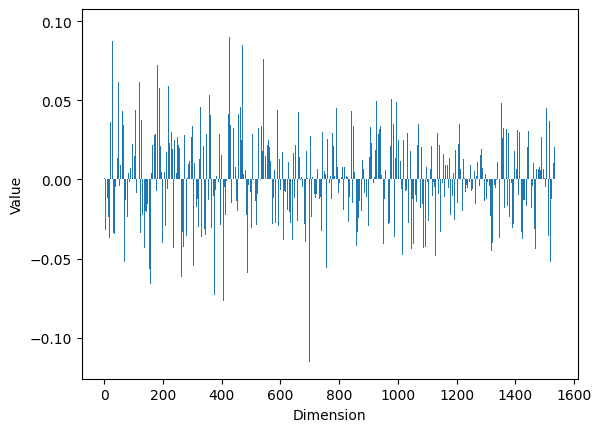

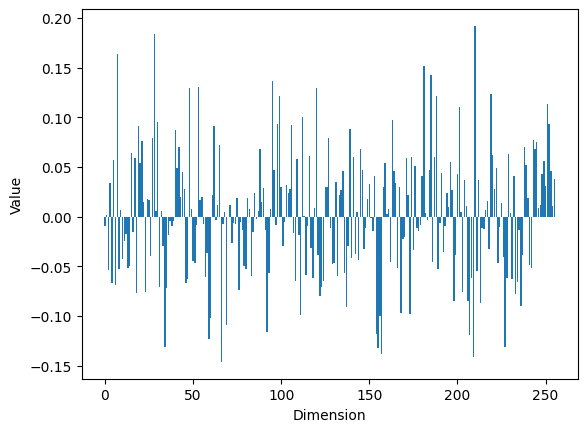

In [3]:
import matplotlib.pyplot as plt


def render_vector(vector):
    """Visualizar los valores del vector en un bar chart"""
    plt.bar(range(len(vector)), vector)
    plt.xlabel('Dimension')
    plt.ylabel('Value')
    plt.show()

render_vector(movies_1536['El Rey León'])
render_vector(movies_256t['El Rey León'])

## Effect on similarity space

In [6]:
# 10 peliculas mas similares 
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def most_similar(movie, movies):
    movie_vec = movies[movie]
    similarities = {k: cosine_similarity([movie_vec], [v])[0][0] for k, v in movies.items()}
    closest = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(closest, columns=['pelicula', 'similitud'])
    return df

most_similar('El Rey León', movies_1536)[:10]

,pelicula,similitud
0,El Rey León,1.000000
1,El Libro de la selva,0.503496
2,La Bella y la Bestia,0.494477
3,Cenicienta,0.456724
4,Encanto,0.454299
5,La gran película de Piglet,0.450369
6,Aladdín,0.448663
7,Frozen: El reino de hielo,0.445374
8,"Merlín, el encantador",0.436161
9,El Jorobado de Notre Dame,0.421666


In [7]:
most_similar('El Rey León', movies_256t)[:10]

,pelicula,similitud
0,El Rey León,1.000000
1,La Bella y la Bestia,0.597887
2,El Libro de la selva,0.552169
3,La gran película de Piglet,0.541187
4,Tiana y el Sapo,0.536729
5,"Las aventuras de Bongo, Mickey y las judías má...",0.527650
6,Cenicienta,0.522674
7,Dumbo,0.520583
8,"Merlín, el encantador",0.502419
9,Aladdín,0.498621


## Comparación de tamaño

In [8]:
import sys

pd.DataFrame({
    '1536': [sys.getsizeof(movies_1536['El Rey León'])],
    '256': [sys.getsizeof(movies_256t['El Rey León'])],
})

,1536,256
0,12728,2200


In [9]:
sys.getsizeof(movies_1536['El Rey León'])/sys.getsizeof(movies_256t['El Rey León'])

5.785454545454545

## Recursos

* [Unboxing Nomic Embed v1.5: Resizable Production Embeddings with MRL](https://www.nomic.ai/blog/posts/nomic-embed-matryoshka)
* [MRL from the Ground Up](https://aniketrege.github.io/blog/2024/mrl/)
